## Προπτυχιακό Μάθημα: **Μηχανική Μάθηση**

### 2η Σειρά ασκήσεων

### **Θέμα:** Μείωση διάστασης και Ομαδοποίηση δεδομένων

Βασίλειος Παπακυριάκου, 5324

Δανάη Χανλαρίδου, 5386

**1. Μείωση διάστασης:**

Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter

Load and Normalize the data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Ανασχηματισμός των δεδομένων σε διανύσματα με διάσταση 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Επιλογή n εικόνων ανά κατηγορία (π.χ. n=1000)
n = 1000
indices = np.hstack([np.random.choice(np.where(y_train == i)[0], n, replace=False) for i in range(10)])
x_train_subset = x_train[indices]
y_train_subset = y_train[indices]

PCA

In [3]:
# Μείωση διάστασης με PCA διατηρώντας το 90% της διακύμανσης
pca = PCA(0.90)
x_train_pca = pca.fit_transform(x_train_subset)
x_test_pca = pca.transform(x_test)
M = x_train_pca.shape[1]

print(f'Μείωση διάστασης σε M={M} με PCA.')

Μείωση διάστασης σε M=82 με PCA.


Creating and training the Autoencoder

In [4]:
input_dim = 784
encoding_dim = M

input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(input_dim//4, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
decoded = layers.Dense(input_dim//4, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(x_train_subset, x_train_subset,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# show results
encoded_imgs = models.Model(input_img, encoded).predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5847 - val_loss: 0.3978
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3804 - val_loss: 0.3528
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3424 - val_loss: 0.3277
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3217 - val_loss: 0.3170
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3123 - val_loss: 0.3108
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3074 - val_loss: 0.3078
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3038 - val_loss: 0.3042
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3010 - val_loss: 0.3033
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2977 - val_loss: 0.3005
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2962 - val_loss: 0.2974
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2930 - val_loss: 0.2956
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2933 

Plot some of the results

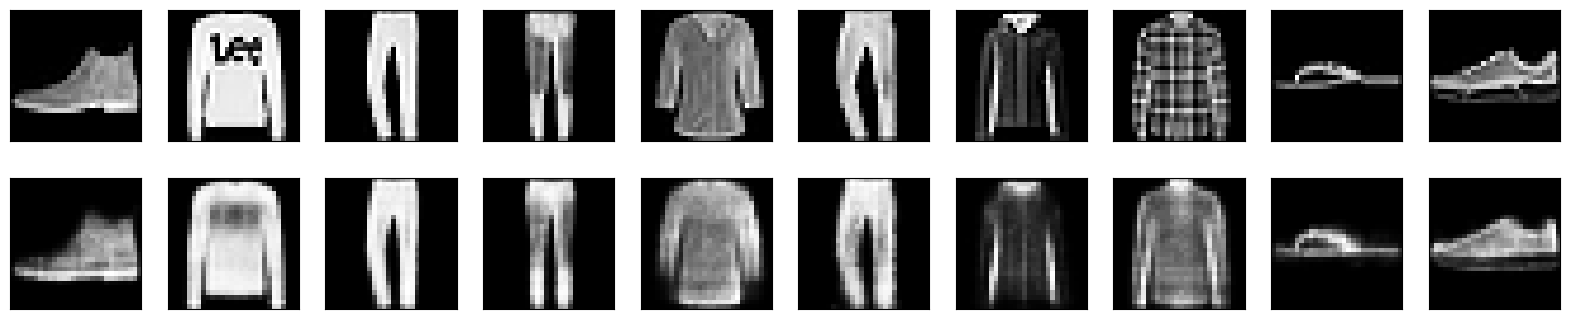

In [5]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Initial images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Rebuilding images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


H καλύτερη μέθοδος ταξινόμησης που βρήκαμε στην 1η εργασία είναι η μέθοδος του Decision Tree

Train and evaluate the Decision Tree on the reduced dimension (PCA)

In [6]:
clf_pca = DecisionTreeClassifier()
clf_pca.fit(x_train_pca, y_train_subset)
y_pred_pca = clf_pca.predict(pca.transform(x_test))

print("Αποτελέσματα με PCA μειωμένη διάσταση:")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

Αποτελέσματα με PCA μειωμένη διάσταση:
Accuracy: 0.7247
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1000
           1       0.93      0.90      0.92      1000
           2       0.59      0.58      0.58      1000
           3       0.77      0.74      0.76      1000
           4       0.58      0.64      0.61      1000
           5       0.80      0.80      0.80      1000
           6       0.44      0.44      0.44      1000
           7       0.81      0.79      0.80      1000
           8       0.83      0.82      0.83      1000
           9       0.85      0.86      0.86      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.73     10000
weighted avg       0.73      0.72      0.73     10000



Train and evaluate the Decision Tree on the reduced dimension (Autoencoder)

In [7]:
encoder = models.Model(input_img, encoded)
x_train_encoded = encoder.predict(x_train_subset)
x_test_encoded = encoder.predict(x_test)

clf_ae = DecisionTreeClassifier()
clf_ae.fit(x_train_encoded, y_train_subset)
y_pred_ae = clf_ae.predict(x_test_encoded)

print("Αποτελέσματα με Autoencoder μειωμένη διάσταση:")
print("Accuracy:", accuracy_score(y_test, y_pred_ae))
print(classification_report(y_test, y_pred_ae))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Αποτελέσματα με Autoencoder μειωμένη διάσταση:
Accuracy: 0.7303
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1000
           1       0.92      0.91      0.91      1000
           2       0.59      0.57      0.58      1000
           3       0.76      0.76      0.76      1000
           4       0.57      0.58      0.58      1000
           5       0.83      0.80      0.82      1000
           6       0.43      0.48      0.45      1000
           7       0.81      0.81      0.81      1000
           8       0.88      0.85      0.87      1000
           9       0.83      0.87      0.85      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



**2. Ομαδοποίηση:**

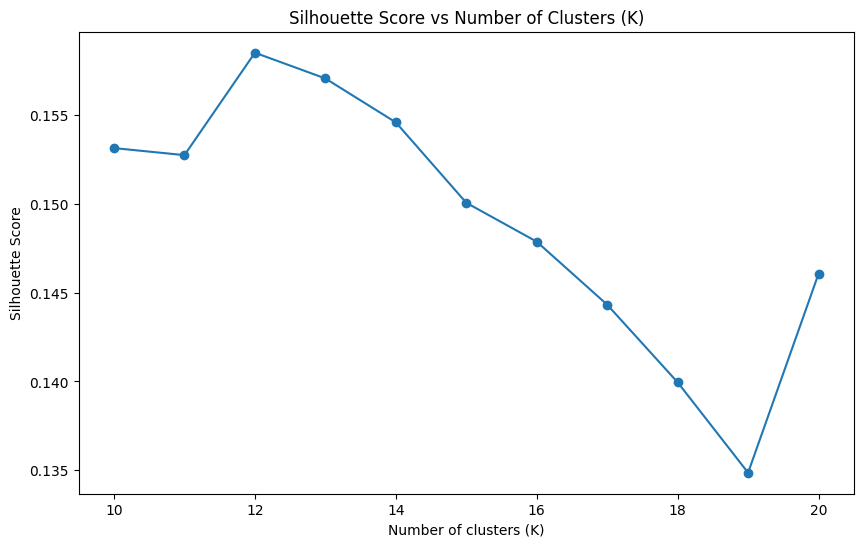

Βέλτιστο K για PCA: 12


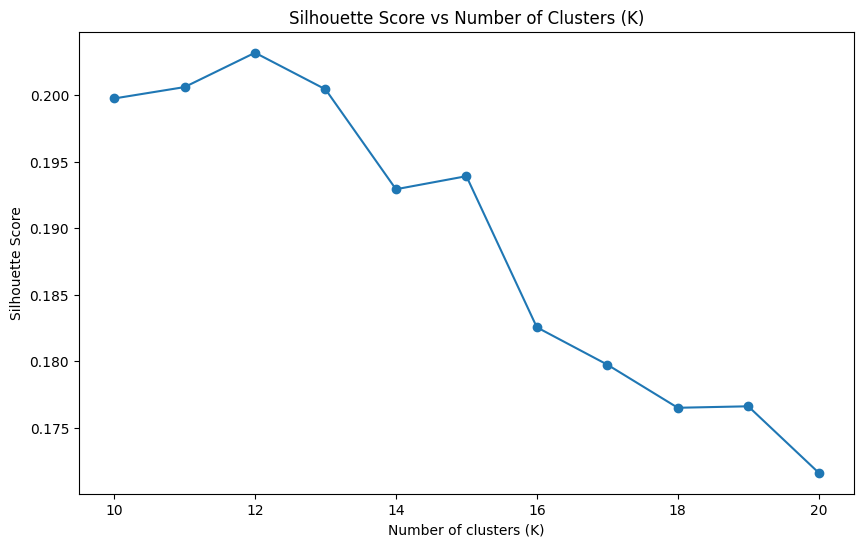

Βέλτιστο K για Autoencoder: 12


In [8]:
K_range = range(10, 21)

def find_best_k(data):
    silhouette_scores = []
    for K in K_range:
        kmeans = KMeans(n_clusters=K, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    best_K = K_range[np.argmax(silhouette_scores)]
    
    # Plot silhouette score vs K
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters (K)')
    plt.show()
    
    return best_K, silhouette_scores

# best K for PCA
best_K_pca, silhouette_scores_pca = find_best_k(x_train_pca)
print(f'Βέλτιστο K για PCA: {best_K_pca}')

# best K for Autoencoders
best_K_ae, silhouette_scores_ae = find_best_k(x_train_encoded)
print(f'Βέλτιστο K για Autoencoder: {best_K_ae}')

Finding the center of every cluster

In [9]:
def find_cluster_centers(data, K):
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data)
    return kmeans.cluster_centers_

def plot_cluster_centers(centers, title):
    plt.figure(figsize=(20, 4))
    for i, center in enumerate(centers):
        ax = plt.subplot(1, len(centers), i + 1)
        plt.imshow(center.reshape(28, 28), cmap='gray')
        plt.title(f'Cluster {i}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

K-Means for PCA and rebuilding centers on the initial dimension

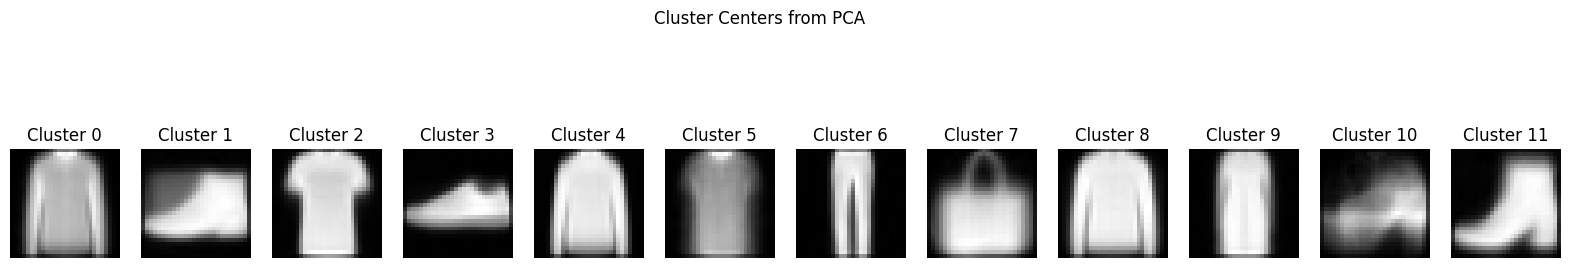

In [10]:
centers_pca = find_cluster_centers(x_train_pca, best_K_pca)
centers_pca_reconstructed = pca.inverse_transform(centers_pca)
plot_cluster_centers(centers_pca_reconstructed, "Cluster Centers from PCA")

K-Means for Autoencoders and rebuiliding centers on the initial dimension

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


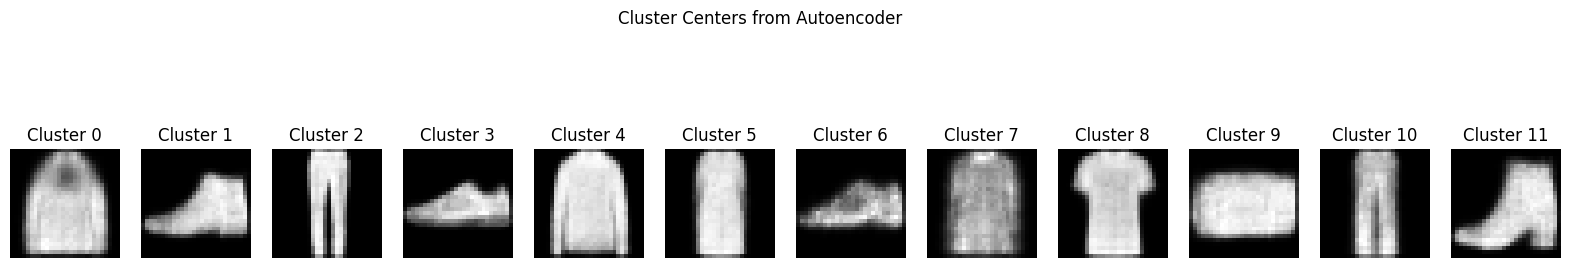

In [11]:
centers_ae = find_cluster_centers(x_train_encoded, best_K_ae)

# Ανάκτηση του decoder από τον Autoencoder
input_dim = 784
encoding_dim = centers_ae.shape[1]

# Δημιουργία νέου μοντέλου μόνο με τον decoder
encoded_input = tf.keras.Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = models.Model(encoded_input, decoder_layer2(decoder_layer1(encoded_input)))

centers_ae_reconstructed = decoder.predict(centers_ae)
plot_cluster_centers(centers_ae_reconstructed, "Cluster Centers from Autoencoder")


Evaluate the quality of clustering - finding the best value for K (PCA- Autoencoders)

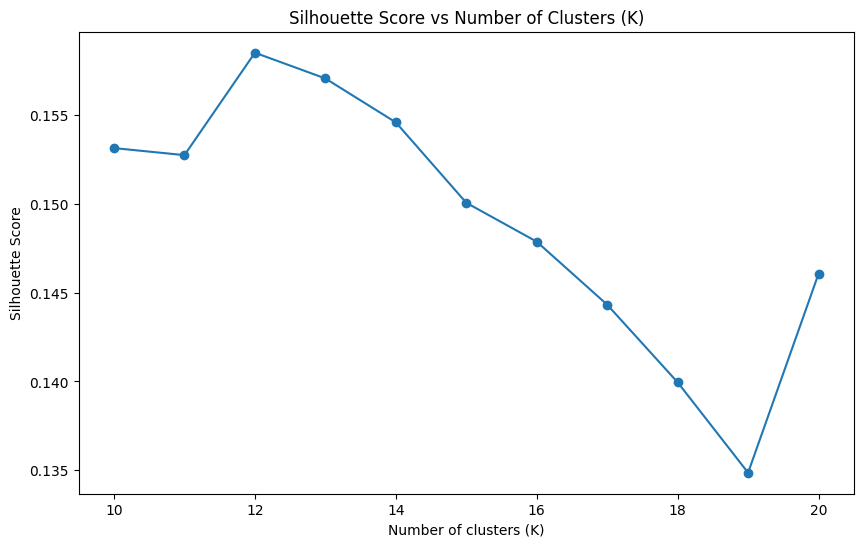

Βέλτιστο K για PCA: 12


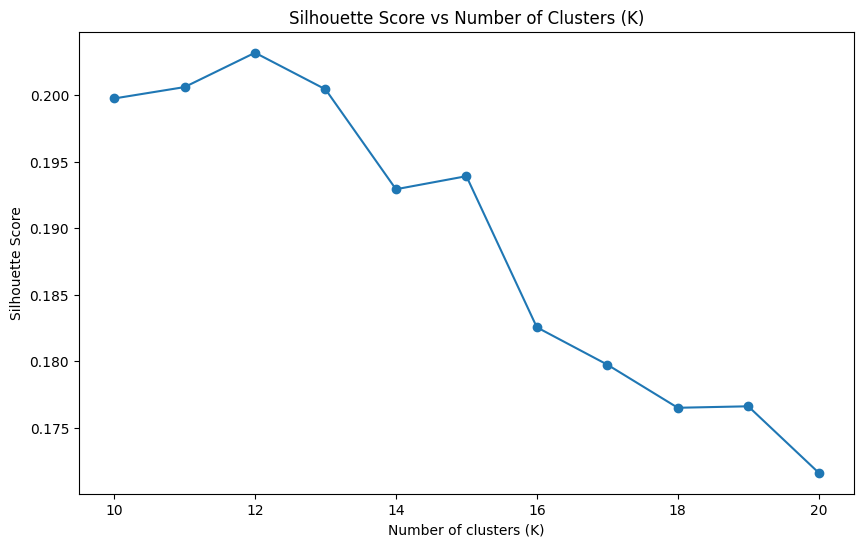

Βέλτιστο K για Autoencoder: 12


In [12]:
K_range = range(10, 21)

def find_best_k(data):
    silhouette_scores = []
    for K in K_range:
        kmeans = KMeans(n_clusters=K, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    best_K = K_range[np.argmax(silhouette_scores)]
    
    # Διάγραμμα silhouette score vs K
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters (K)')
    plt.show()
    
    return best_K, silhouette_scores

#best K for PCA
best_K_pca, silhouette_scores_pca = find_best_k(x_train_pca)
print(f'Βέλτιστο K για PCA: {best_K_pca}')

# best K for Autoencoder
best_K_ae, silhouette_scores_ae = find_best_k(x_train_encoded)
print(f'Βέλτιστο K για Autoencoder: {best_K_ae}')

Calculate Purity and F-measure

In [13]:
def calculate_purity(labels_true, labels_pred):
    cluster_classes = []
    for cluster_id in np.unique(labels_pred):
        indices = np.where(labels_pred == cluster_id)
        cluster_classes.append(labels_true[indices])
    
    total_samples = len(labels_true)
    correctly_classified = 0
    
    for cluster in cluster_classes:
        majority_class = Counter(cluster).most_common(1)[0][1]
        correctly_classified += majority_class
    
    purity = correctly_classified / total_samples
    return purity

def calculate_f_measure(labels_true, labels_pred):
    f_measures = []
    for cluster_id in np.unique(labels_pred):
        indices = np.where(labels_pred == cluster_id)
        cluster_labels = labels_true[indices]
        majority_class = Counter(cluster_labels).most_common(1)[0][0]
        
        TP = sum(cluster_labels == majority_class)
        FP = sum(cluster_labels != majority_class)
        FN = sum((labels_true == majority_class) & (labels_pred != cluster_id))
        
        precision = TP / (TP + FP) if TP + FP > 0 else 0
        recall = TP / (TP + FN) if TP + FN > 0 else 0
        f_measure = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
        f_measures.append(f_measure)
    
    total_f_measure = sum(f_measures)
    return total_f_measure

# Apply K-means clustering with best value of K on the dataset
kmeans_pca = KMeans(n_clusters=best_K_pca, random_state=42)
labels_pca = kmeans_pca.fit_predict(x_train_pca)

kmeans_ae = KMeans(n_clusters=best_K_ae, random_state=42)
labels_ae = kmeans_ae.fit_predict(x_train_encoded)

Purity and F-measure for PCA data

In [14]:
purity_pca = calculate_purity(y_train[:len(labels_pca)], labels_pca)
f_measure_pca = calculate_f_measure(y_train[:len(labels_pca)], labels_pca)

print(f'Purity for PCA: {purity_pca:.4f}')
print(f'F-measure for PCA: {f_measure_pca:.4f}')

Purity for PCA: 0.1166
F-measure for PCA: 1.2445


Purity and F-measure for Autoencoder data

In [15]:
purity_ae = calculate_purity(y_train[:len(labels_ae)], labels_ae)
f_measure_ae = calculate_f_measure(y_train[:len(labels_ae)], labels_ae)

print(f'Purity for Autoencoder: {purity_ae:.4f}')
print(f'F-measure for Autoencoder: {f_measure_ae:.4f}')

Purity for Autoencoder: 0.1150
F-measure for Autoencoder: 1.2202


Για να αξιολογήσουμε τη ποιότητα της ομαδοποίησης, υπολογίσαμε τόσο το Purity όσο και το F-measure για κάθε περίπτωση και πρέπει να συγκρίνουμε τα αποτελέσματα για τα δεδομένα PCA και Autoencoder. Παρατηρούμε πως προσεγγίζει αρκετά καλα το ένα το άλλο και συνεπώς η ομαδοποίηση που γίνεται είναι καλή.